In [1]:
import datetime,time
import numpy as np
import pandas as pd
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error, roc_curve, classification_report,auc)

from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# label_code
label_code = ['Benign','Bot','DDOS attack-LOIC-UDP','DDOS attack-HOIC','DDoS attacks-LOIC-HTTP','DoS attacks-GoldenEye',
              'DoS attacks-Hulk', 'DoS attacks-Slowloris','SSH-Bruteforce','FTP-BruteForce',
              'Infilteration','Brute Force -Web','Brute Force -XSS','SQL Injection']

In [3]:
x_train = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/IDS/CIC-IDS2018/pkl/dsste_x_train.pkl')
y_train = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/IDS/CIC-IDS2018/pkl/dsste_y_train.pkl')
x_test  = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/IDS/CIC-IDS2018/pkl/dsste_x_test.pkl')
y_test  = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/IDS/CIC-IDS2018/pkl/dsste_y_test.pkl')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks/IDS/CIC-IDS2018/pkl/dsste_x_train.pkl'

In [3]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train =np.array(y_train)
y_test =np.array(y_test)

# Random Forest

Training time: 102
Testing time: 1
Classification Report
                        precision    recall  f1-score   support

                Benign     0.9854    0.8690    0.9235      8000
                   Bot     0.9990    0.9995    0.9993      4000
  DDOS attack-LOIC-UDP     0.9885    0.9971    0.9928       346
      DDOS attack-HOIC     0.9993    1.0000    0.9996      4000
DDoS attacks-LOIC-HTTP     0.9968    0.9990    0.9979      4000
 DoS attacks-GoldenEye     1.0000    1.0000    1.0000      4000
      DoS attacks-Hulk     1.0000    1.0000    1.0000      4000
 DoS attacks-Slowloris     0.9995    0.9995    0.9995      1982
        SSH-Bruteforce     1.0000    0.9990    0.9995      4000
        FTP-BruteForce     0.8182    1.0000    0.9000         9
         Infilteration     0.7952    0.9738    0.8755      4000
      Brute Force -Web     0.7299    0.9091    0.8097       110
      Brute Force -XSS     0.7800    0.8478    0.8125        46
         SQL Injection     0.7059    0.7500   

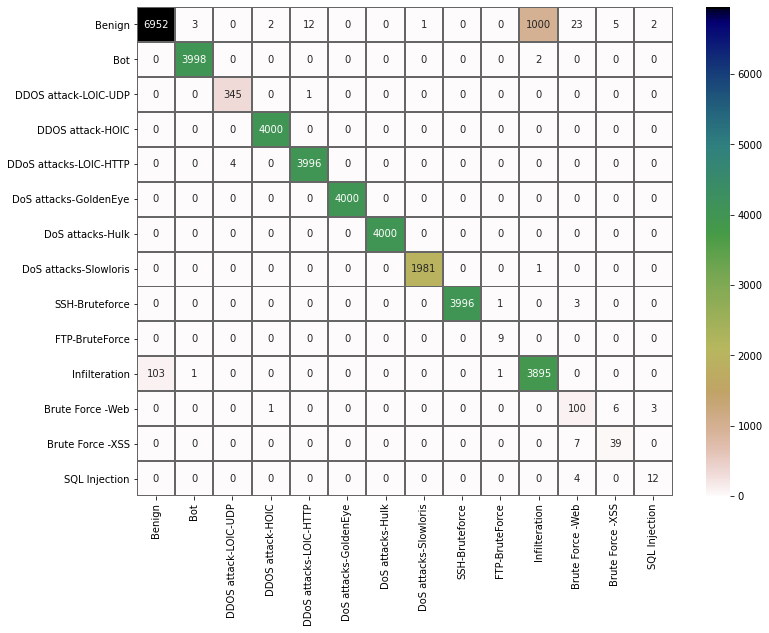

In [ ]:
# RandomForestClassifier
# fit
fit_startime = datetime.datetime.now()
model = RandomForestClassifier(n_estimators=100)
model = model.fit(x_train, y_train.ravel())
fit_endtime = datetime.datetime.now()
print('Training time:',(fit_endtime - fit_startime).seconds)

# expeced
expected = y_test.ravel()

# Testing
test_startime = datetime.datetime.now()
predicted = model.predict(x_test)
test_endtime = datetime.datetime.now()
print("Testing time:",(test_endtime - test_startime).seconds)

# Pre, Recall, F1-score 
print('Classification Report')
print(classification_report(expected, predicted, target_names = label_code, digits=4))


predicted = [np.round(x) for x in predicted]
predicted = np.array(predicted)

# confusion matrix
cm = metrics.confusion_matrix(expected, predicted)
f, ax = plt.subplots(figsize=(12, 9))
ax = sns.heatmap(cm, annot=True, fmt='0.6g',  linewidths=1 ,cmap='gist_earth_r', linecolor='#666666',
                 xticklabels=label_code, yticklabels=label_code)
plt.show()

# SVM

Training time: 438
Testing time: 0
Classification Report
                        precision    recall  f1-score   support

                Benign     0.8444    0.9540    0.8959      8000
                   Bot     0.9972    0.9895    0.9933      4000
  DDOS attack-LOIC-UDP     0.9830    1.0000    0.9914       346
      DDOS attack-HOIC     0.9899    0.9998    0.9948      4000
DDoS attacks-LOIC-HTTP     0.9787    0.9990    0.9887      4000
 DoS attacks-GoldenEye     0.9955    0.9972    0.9964      4000
      DoS attacks-Hulk     0.9963    0.9998    0.9980      4000
 DoS attacks-Slowloris     0.9975    0.9985    0.9980      1982
        SSH-Bruteforce     1.0000    0.9990    0.9995      4000
        FTP-BruteForce     0.6429    1.0000    0.7826         9
         Infilteration     0.8870    0.6318    0.7379      4000
      Brute Force -Web     0.7064    0.7000    0.7032       110
      Brute Force -XSS     0.6341    0.5652    0.5977        46
         SQL Injection     0.4615    0.3750   

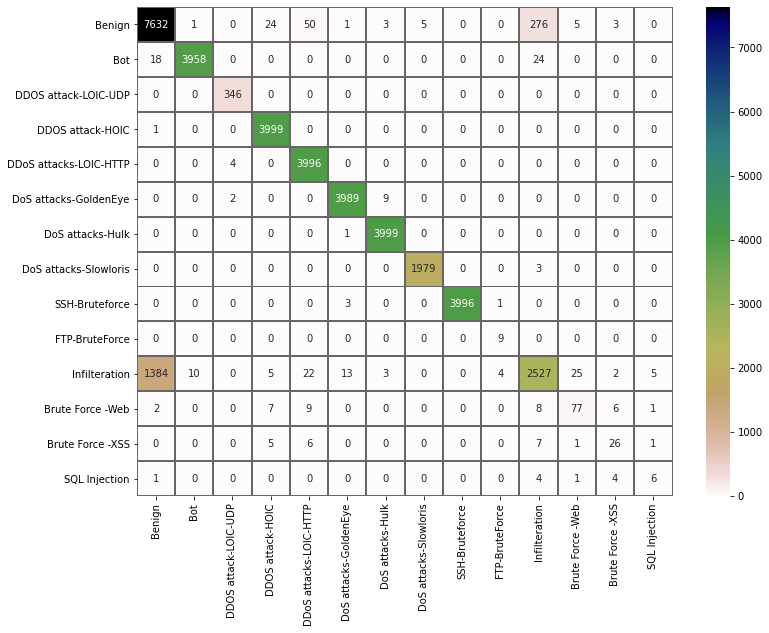

In [ ]:
# fit
fit_startime = datetime.datetime.now()
model = svm.LinearSVC()
model = model.fit(x_train, y_train.ravel())
fit_endtime = datetime.datetime.now()
print('Training time:',(fit_endtime - fit_startime).seconds)

# expeced
expected = y_test.ravel()

# Testing
test_startime = datetime.datetime.now()
predicted = model.predict(x_test)
test_endtime = datetime.datetime.now()
print("Testing time:",(test_endtime - test_startime).seconds)

# Pre, Recall, F1-score 
print('Classification Report')
print(classification_report(expected, predicted, target_names = label_code, digits=4))


predicted = [np.round(x) for x in predicted]
predicted = np.array(predicted)



# confusion matrix
cm = metrics.confusion_matrix(expected, predicted)
f, ax = plt.subplots(figsize=(12, 9))
ax = sns.heatmap(cm, annot=True, fmt='0.6g',  linewidths=1 ,cmap='gist_earth_r', linecolor='#666666',
                 xticklabels=label_code, yticklabels=label_code)
plt.show()

# XGBoost

Training time: 1011
Testing time: 2
Classification Report
                        precision    recall  f1-score   support

                Benign     0.9503    0.8636    0.9049      8000
                   Bot     0.9988    1.0000    0.9994      4000
  DDOS attack-LOIC-UDP     0.9746    0.9971    0.9857       346
      DDOS attack-HOIC     1.0000    1.0000    1.0000      4000
DDoS attacks-LOIC-HTTP     0.9987    0.9960    0.9974      4000
 DoS attacks-GoldenEye     1.0000    1.0000    1.0000      4000
      DoS attacks-Hulk     1.0000    1.0000    1.0000      4000
 DoS attacks-Slowloris     0.9995    1.0000    0.9997      1982
        SSH-Bruteforce     0.9998    1.0000    0.9999      4000
        FTP-BruteForce     1.0000    0.8889    0.9412         9
         Infilteration     0.7725    0.9090    0.8352      4000
      Brute Force -Web     0.7111    0.5818    0.6400       110
      Brute Force -XSS     0.8000    0.7826    0.7912        46
         SQL Injection     0.2456    0.8750  

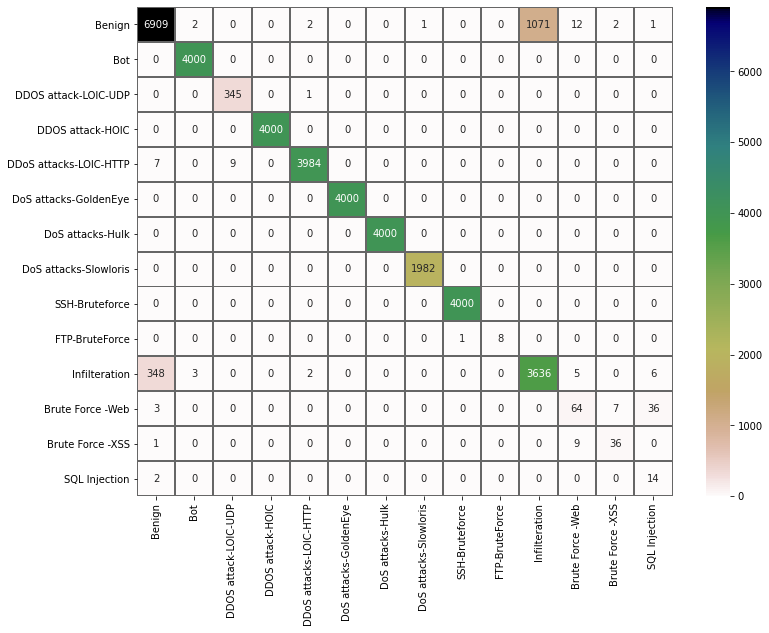

In [4]:
from xgboost import XGBClassifier

fit_startime = datetime.datetime.now()               
model = XGBClassifier(objective='multi:softmax', booster='gbtree', verbosity=0,silent=0,learning_rate=0.1)
model.fit(x_train, y_train.ravel(), eval_metric='mlogloss')
fit_endtime = datetime.datetime.now()
print('Training time:',(fit_endtime - fit_startime).seconds)

# expeced
expected = y_test.ravel()

# Testing
test_startime = datetime.datetime.now()
predicted = model.predict(x_test)
test_endtime = datetime.datetime.now()
print("Testing time:",(test_endtime - test_startime).seconds)

# Pre, Recall, F1-score 
print('Classification Report')
print(classification_report(expected, predicted, target_names = label_code, digits=4))


predicted = [np.round(x) for x in predicted]
predicted = np.array(predicted)



# confusion matrix
cm = metrics.confusion_matrix(expected, predicted)
f, ax = plt.subplots(figsize=(12, 9))
ax = sns.heatmap(cm, annot=True, fmt='0.6g',  linewidths=1 ,cmap='gist_earth_r', linecolor='#666666',
                 xticklabels=label_code, yticklabels=label_code)
plt.show()